## Fitting, prediction and accuracy check with scaled data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_estate = pd.read_csv("U:/Data Science Masters Program/Daywise Practice/Decision Tree E2E Project and Deployment/Dataset/real_estate_data.csv")
df_estate.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


<Axes: >

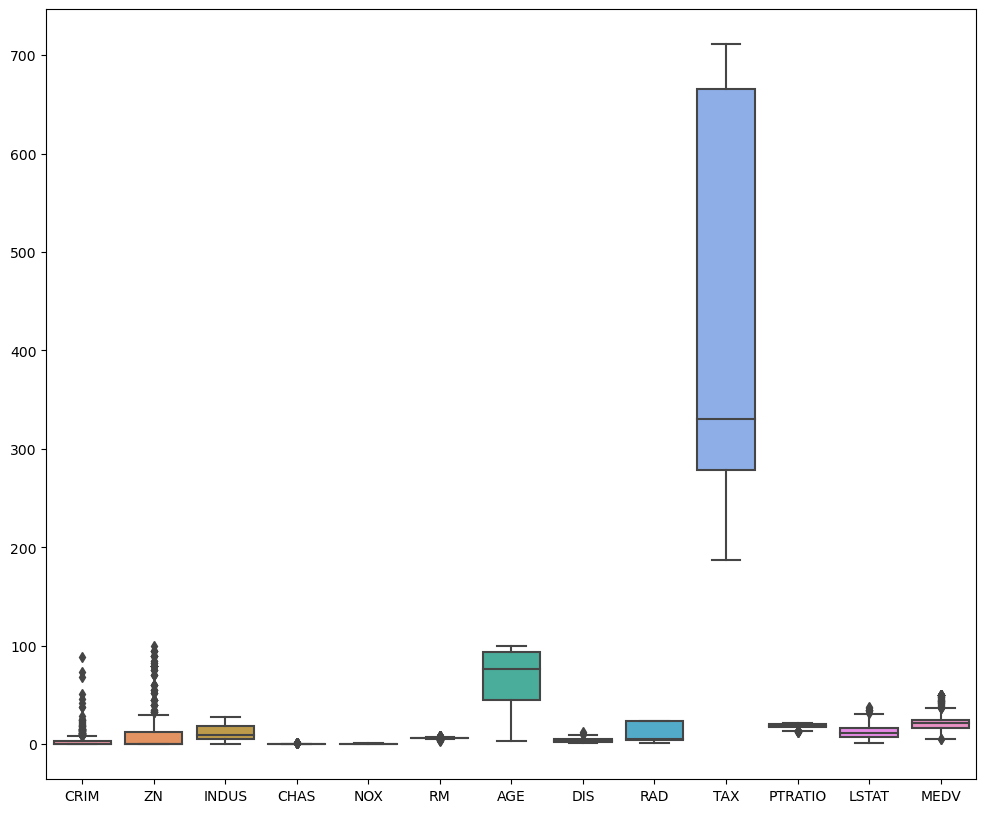

In [4]:
# to see if there are any outliers within dataset
plt.figure(figsize=(12,10))
sns.boxplot(df_estate)

<Axes: >

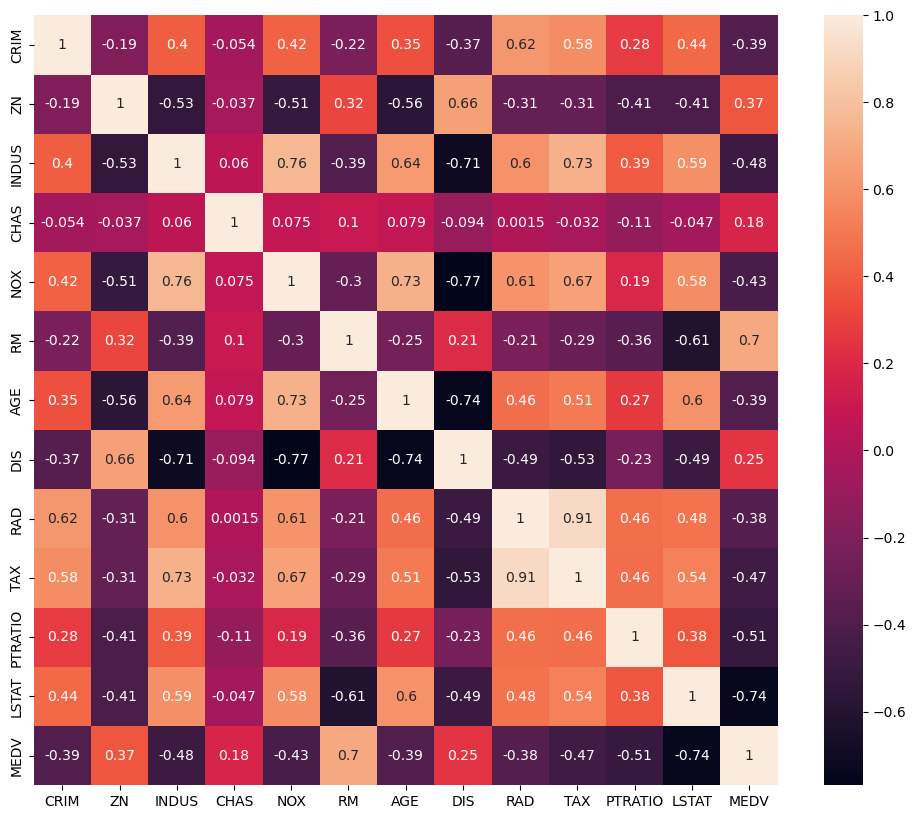

In [5]:
# to see correlation amongst features
plt.figure(figsize=(12,10))
sns.heatmap(df_estate.corr(), annot=True)

In [6]:
# check for null values

df_estate.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df_estate[df_estate.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,NaN,22.4


In [8]:
# dropping rows with null values

print(df_estate.shape)

df_estate.dropna(axis=0, inplace=True)

print(df_estate.shape)

(506, 13)
(394, 13)


In [9]:
df_estate.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# check for duplicate values

df_estate.duplicated().any(), df_estate.duplicated().sum()

(False, 0)

In [11]:
df_estate.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [12]:
# splitting dataset into dependent and target variables

X = df_estate.iloc[:,:-1]
y = df_estate.iloc[:,-1]

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [15]:
# splitting dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((315, 12), (79, 12), (315,), (79,))

### Fitting, prediction and accuracy check with scaled data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\Users\Shree\AppData\Local\Temp\ipykernel_10640\3090507217.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

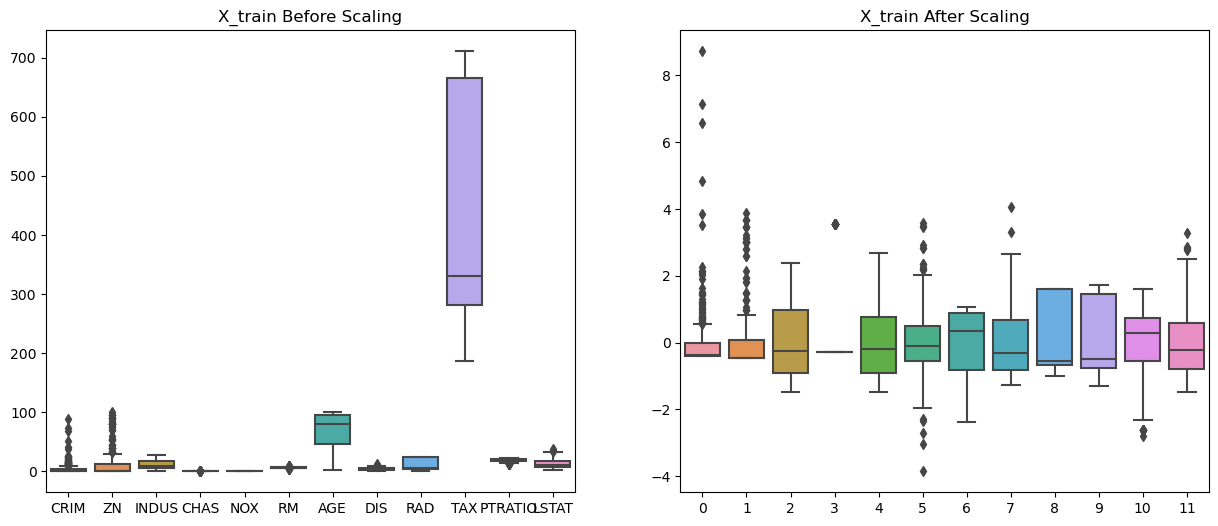

In [18]:
# to see if there are any outliers within dataset
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
regressor = DecisionTreeRegressor()

In [21]:
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [22]:
parameters ={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['auto', 'sqrt', 'log2'],
  'ccp_alpha': [1.0,2.0,3.0,4.0,5.0],
 'random_state': [1,42],
}

In [23]:
reg_grid = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)

In [24]:
regressorcv=DecisionTreeRegressor(criterion='absolute_error',max_depth=3,max_features='auto',splitter='best',ccp_alpha=1.0,random_state=42)

In [25]:
regressorcv.fit(X_train_scaled, y_train)

c:\Users\Shree\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(ccp_alpha=1.0, criterion='absolute_error', max_depth=3,
                      max_features='auto', random_state=42)

In [26]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([24.8, 20.9, 23.1, 23.2, 19.7, 36.5, 22.2, 30.1, 29.8, 17.8, 21.7,
       43.1, 22.2, 19.3, 21.8, 28. , 17. , 17.5, 24.3, 23.2, 20.2, 18.3,
       17.8, 29.8, 18.7, 18.1, 24.4, 30.1, 19.9, 24.4, 44. , 12. , 19.6,
       17.7, 19.7, 22.2, 23.8, 20.9, 20.7, 27.5, 28.4, 45.4, 21.4, 28.4,
       30.3, 19.7, 23.7, 17.9, 14.5, 24.6, 21.1, 19.3, 13.1, 23.2, 19.7,
       23.8, 48.5, 19.8, 18.4, 20.6, 21.2, 22. , 14.1, 28.4,  7.2, 31.5,
       14.2, 27.5, 23.1, 16.5, 37.3, 31.5, 24.5, 20.6, 23.2, 43.8, 21.4,
       34.7, 12.7])

In [27]:
y_pred_cv = regressorcv.predict(X_test_scaled)
y_pred_cv

array([22. , 22. , 22. , 22. , 13.6, 35. , 22. , 35. , 22. , 13.6, 13.6,
       35. , 22. , 13.6, 22. , 22. , 13.6, 22. , 22. , 13.6, 22. , 22. ,
       13.6, 22. , 22. , 13.6, 22. , 22. , 22. , 22. , 35. , 13.6, 22. ,
       22. , 13.6, 22. , 22. , 22. , 22. , 22. , 22. , 35. , 22. , 22. ,
       35. , 13.6, 22. , 13.6, 22. , 22. , 22. , 22. , 13.6, 13.6, 13.6,
       22. , 35. , 13.6, 22. , 22. , 22. , 22. , 13.6, 22. , 13.6, 35. ,
       13.6, 35. , 22. , 13.6, 35. , 35. , 22. , 22. , 13.6, 35. , 22. ,
       35. , 13.6])

In [28]:
# to calculate confusion_matrix, accuracy_score, classification report

from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_pred).round(2), r2_score(y_test, y_pred_cv).round(2)

(0.62, 0.42)

In [30]:
import pickle

In [31]:
# pickling standard scaler file

file = open('U:/Data Science Masters Program/Daywise Practice/Decision Tree E2E Project and Deployment/Model/scaler.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [32]:
# pickling prediction file

file = open('U:/Data Science Masters Program/Daywise Practice/Decision Tree E2E Project and Deployment/Model/regressor_scaled.pkl','wb')
pickle.dump(regressor,file)
file.close()